In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline


In [4]:
water_df = pd.read_csv('/content/waterpredict.csv')
water_df.tail(5)

,Date,Consumption
3795,2020-08-29,117248.8005
3796,2020-08-30,117172.7614
3797,2020-08-31,117165.0869
3798,2020-09-01,116737.0168
3799,2020-09-02,116047.5641


In [5]:
water_df.head(5)

,Date,Consumption
0,2009-07-01,108637.2762
1,2009-07-02,108638.8474
2,2009-07-03,108633.8275
3,2009-07-04,109082.4222
4,2009-07-05,109071.7580


In [6]:
water_df.shape

(3800, 2)

In [7]:
water_df.isnull().any()

Date           False
Consumption    False
dtype: bool

array([<Axes: >], dtype=object)

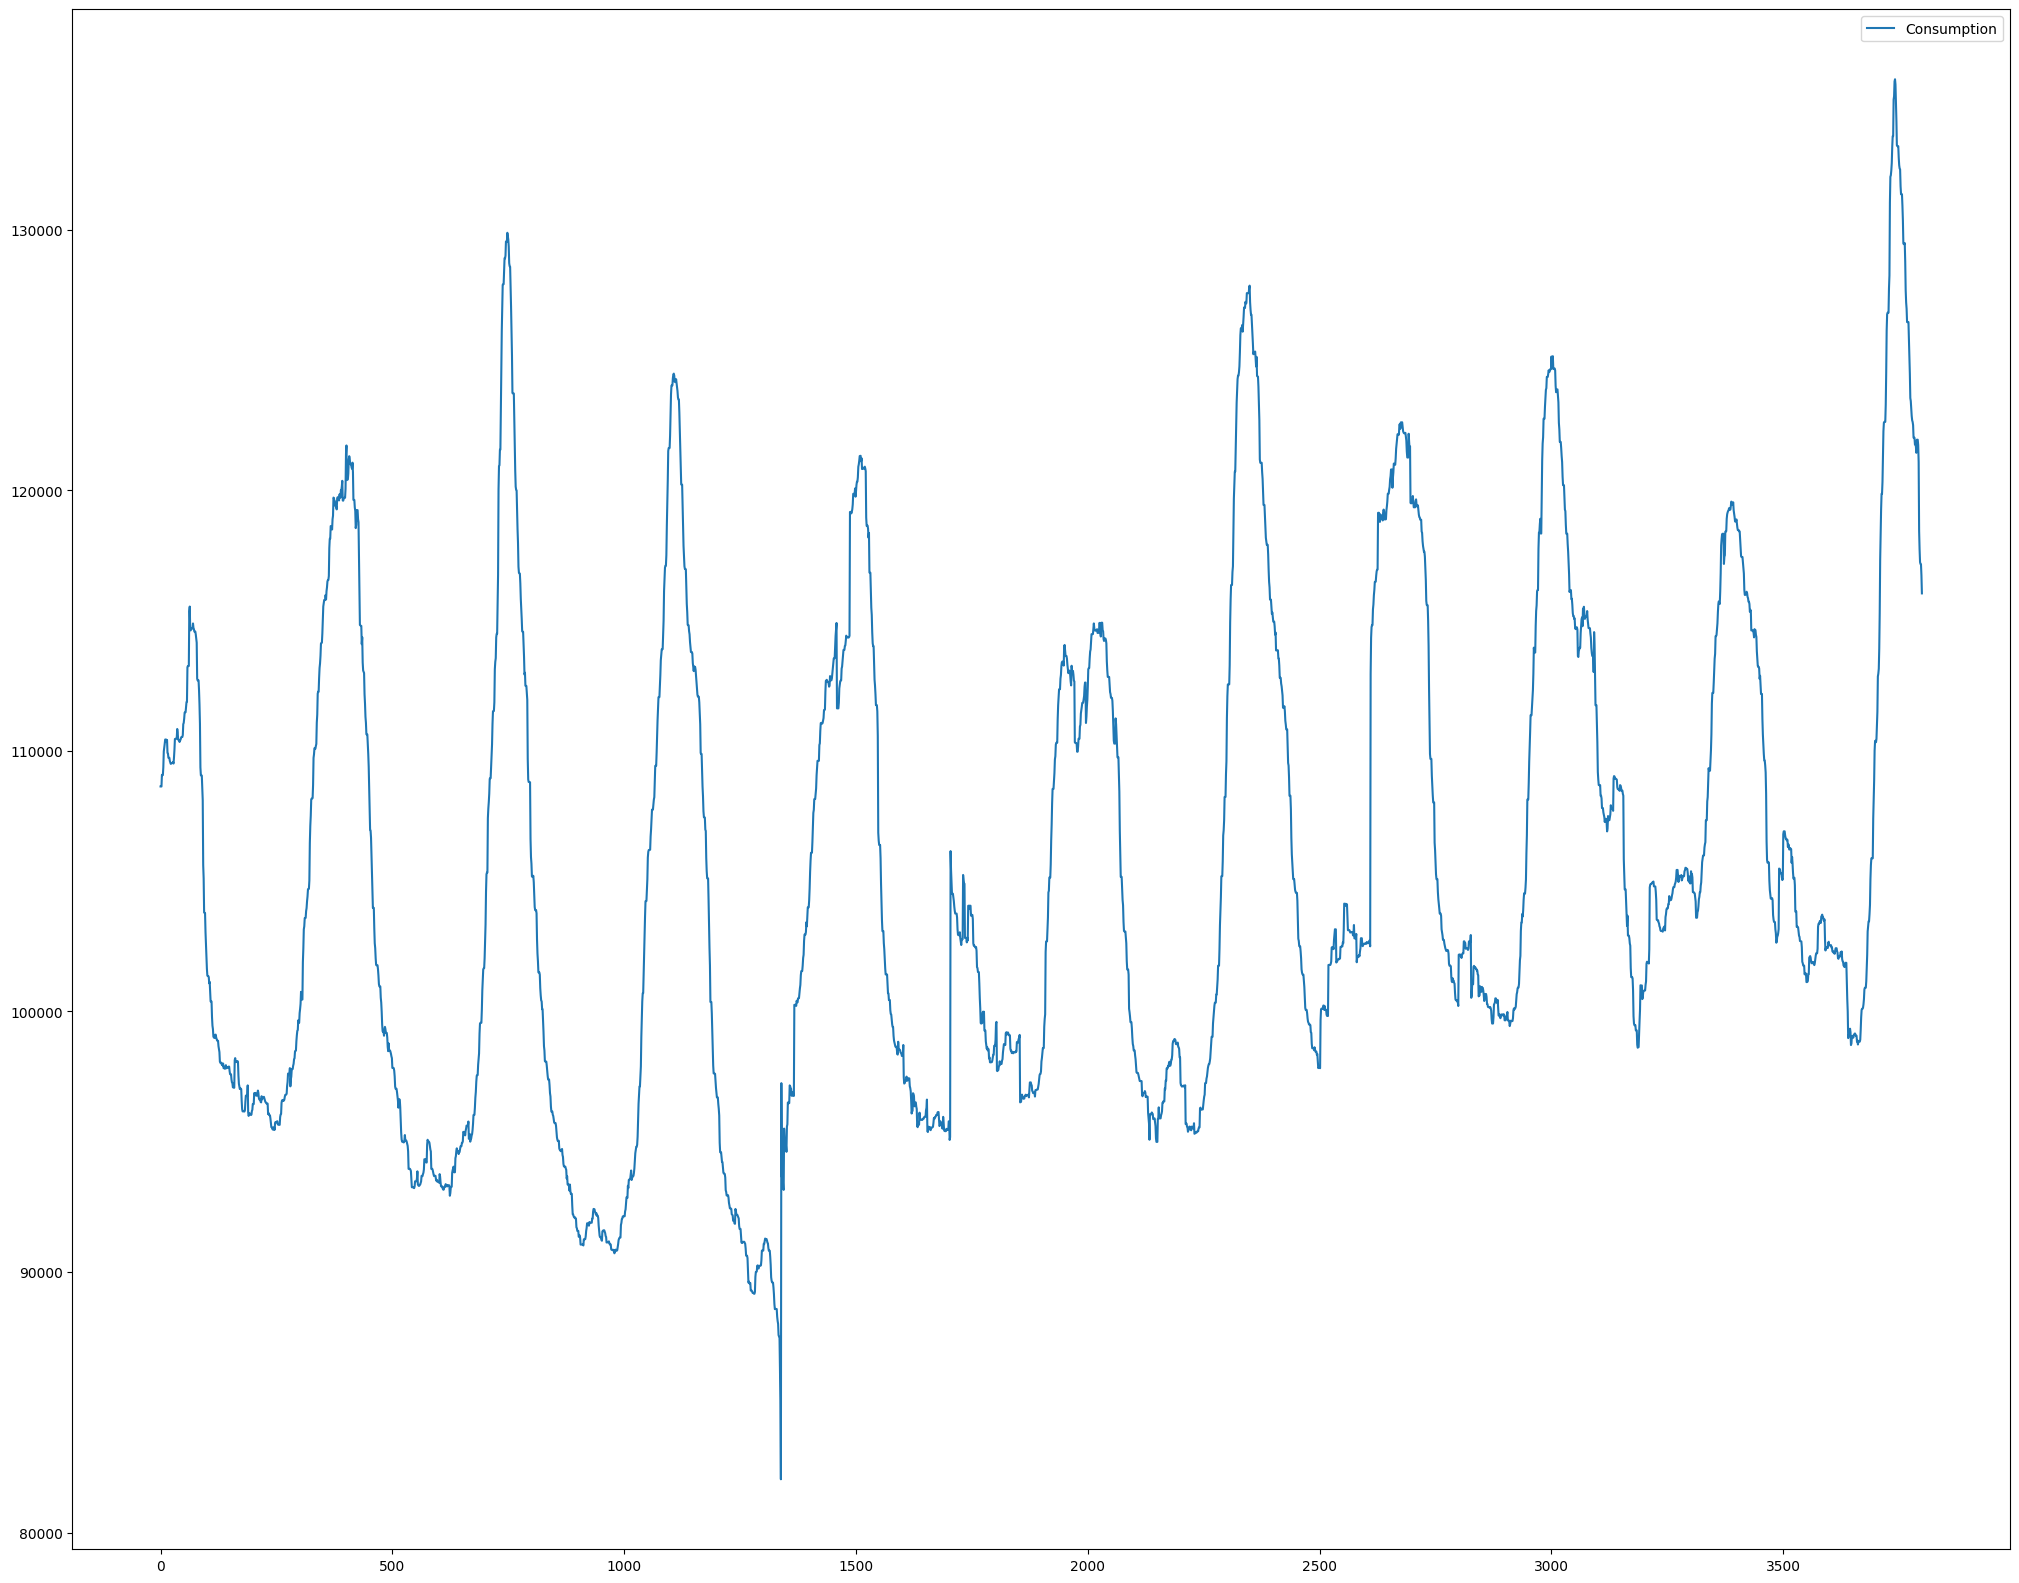

In [8]:
water_df.plot(subplots=True, figsize=(25,20))

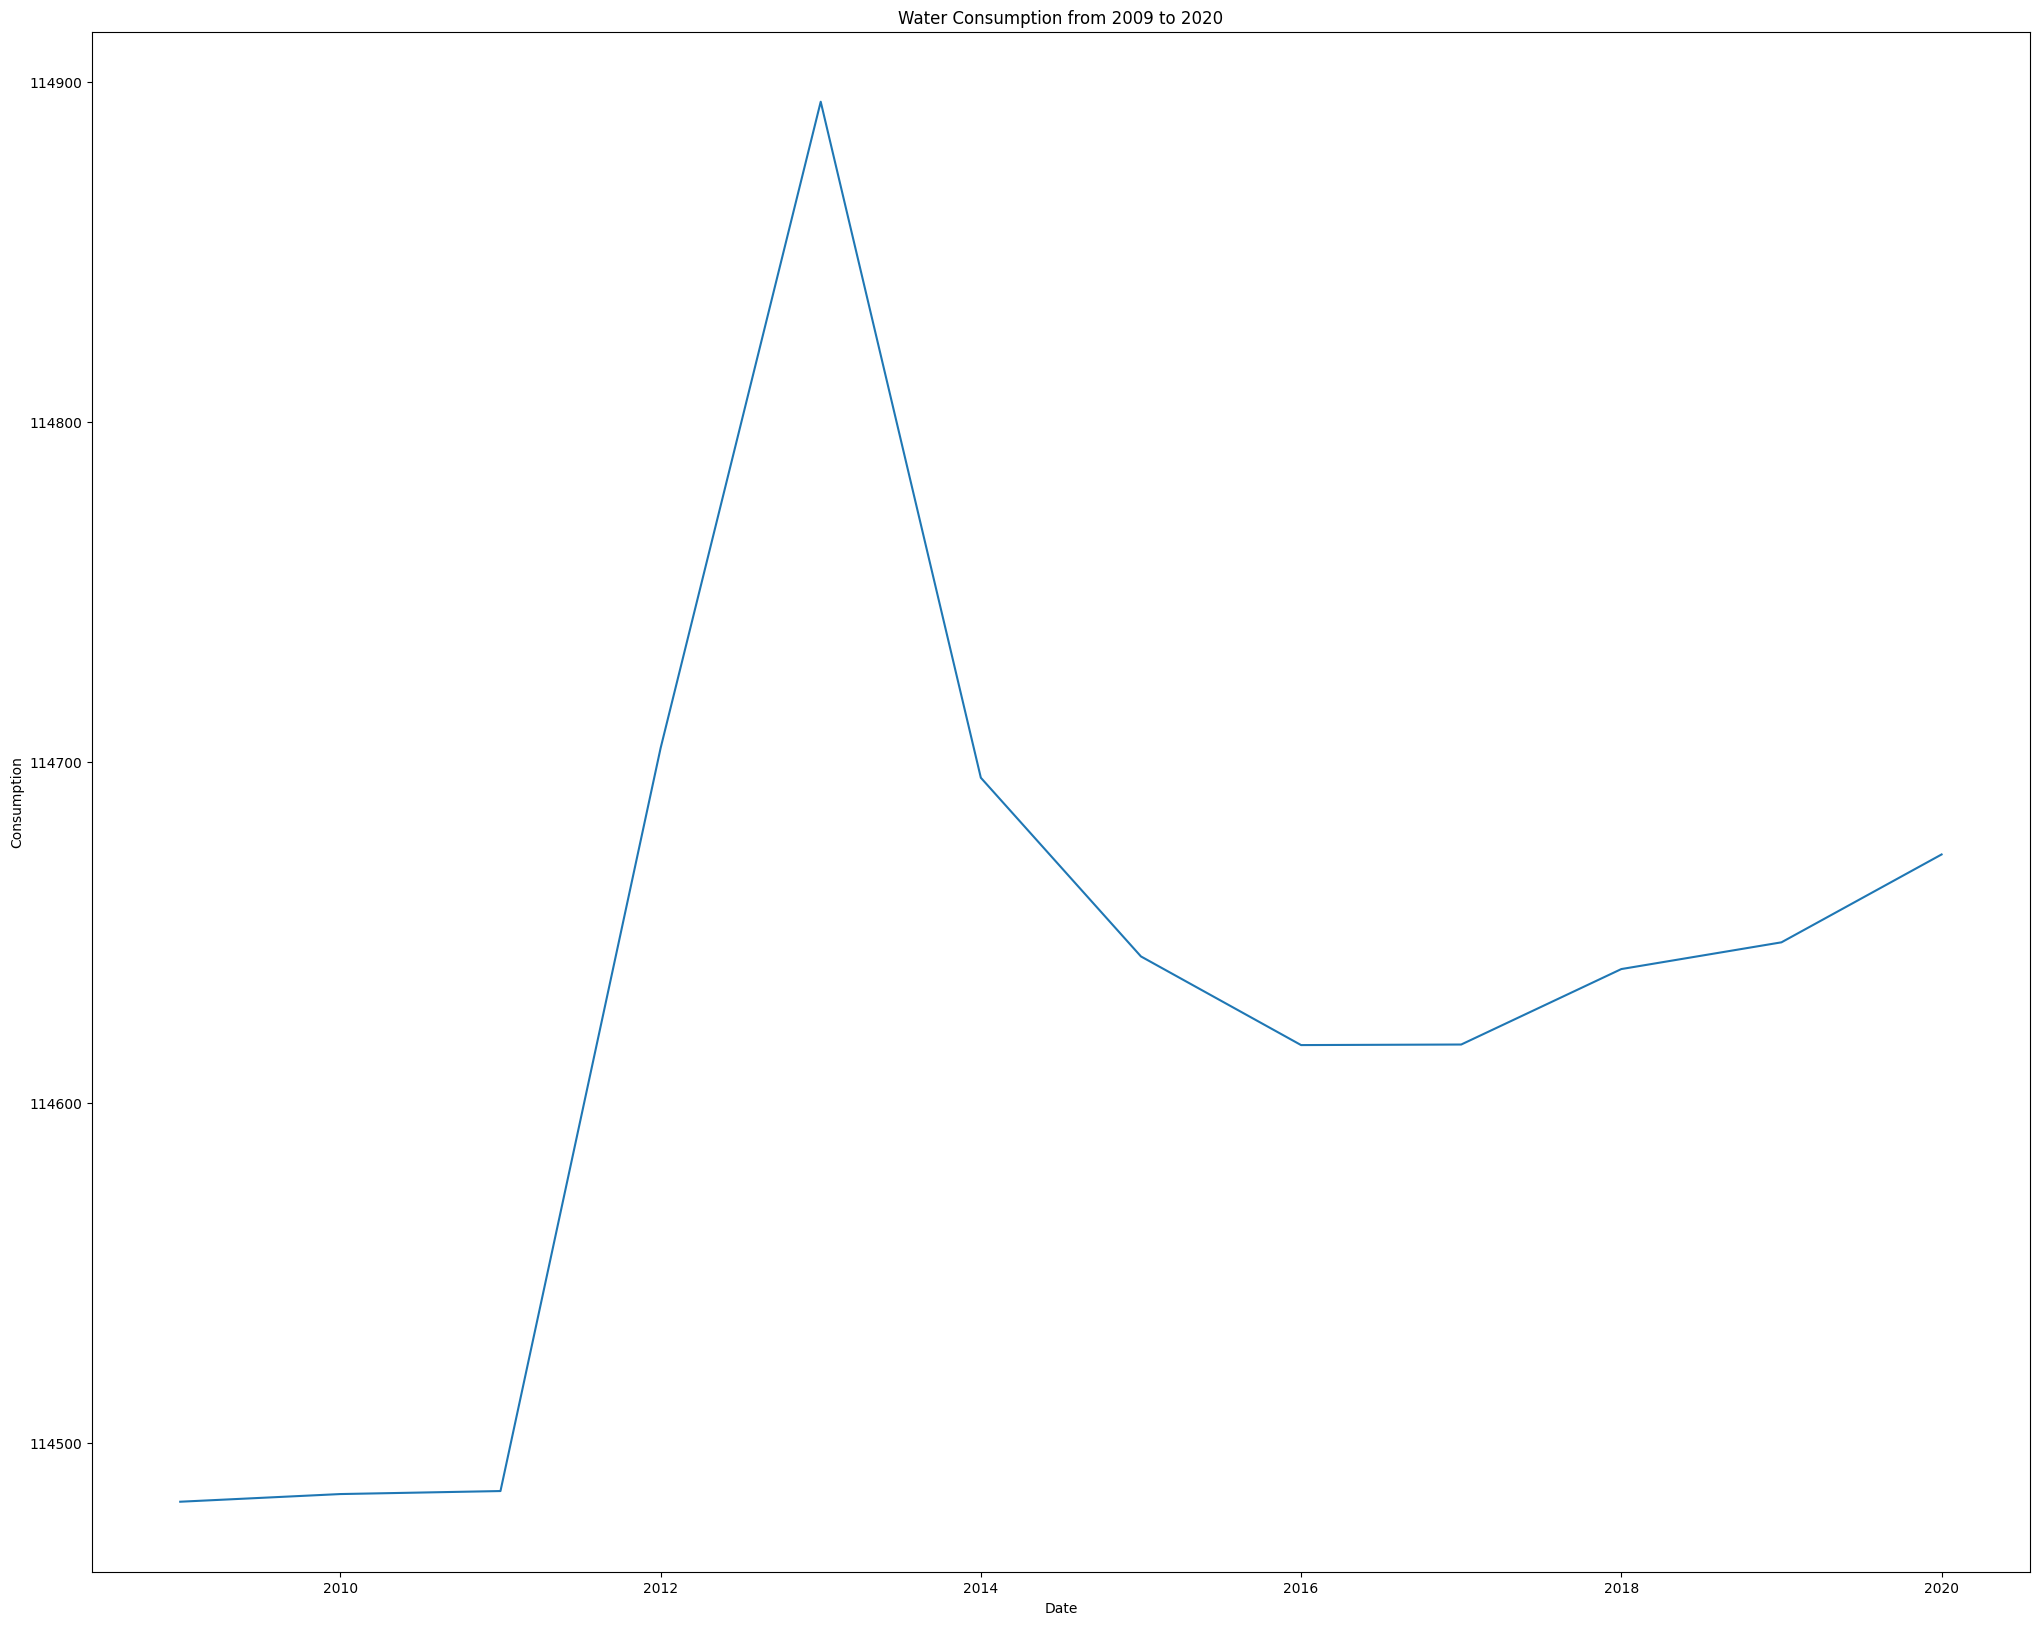

In [9]:
# prompt: # Assuming 'Date' is a column and you want to filter by year:
# water_df['Date'] = pd.to_datetime(water_df['Date']) # Convert 'Date' column to datetime if it's not already
# water_df.set_index('Date', inplace=True) # Set 'Date' column as index
# water_df['2009':'2020'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20)) not index   take it as x and y is consumption  update code

water_df['Date'] = pd.to_datetime(water_df['Date'])  # Convert 'Date' column to datetime if it's not already
# Assuming you want to plot 'Consumption' against 'Date' for the years 2009-2020
plt.figure(figsize=(25, 20))
plt.plot(water_df.loc['2009':'2020', 'Consumption'])
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Water Consumption from 2009 to 2020')
plt.show()


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Consumption'}>]], dtype=object)

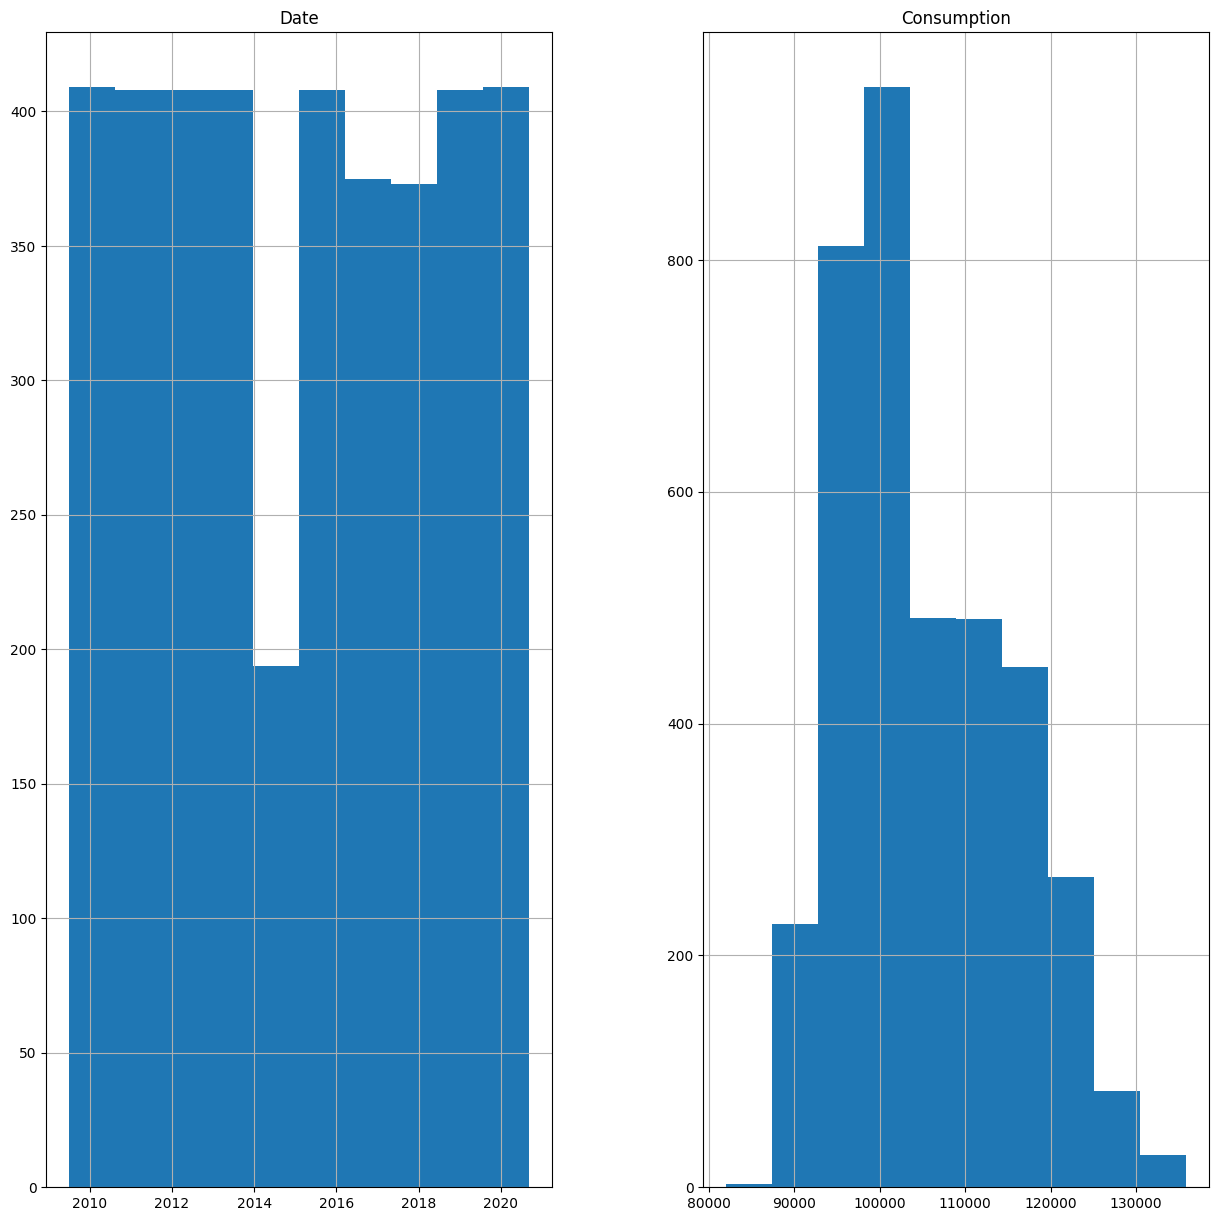

In [10]:
water_df.hist(bins=10,figsize=(15,15))

In [11]:
water_df

,Date,Consumption
0,2009-07-01,108637.2762
1,2009-07-02,108638.8474
2,2009-07-03,108633.8275
3,2009-07-04,109082.4222
4,2009-07-05,109071.7580
...,...,...
3795,2020-08-29,117248.8005
3796,2020-08-30,117172.7614
3797,2020-08-31,117165.0869
3798,2020-09-01,116737.0168


In [12]:
x = water_df.drop('Consumption',axis=1)
y = water_df['Consumption']

In [13]:
x.head()

,Date
0,2009-07-01
1,2009-07-02
2,2009-07-03
3,2009-07-04
4,2009-07-05


In [14]:
y.head()

0    108637.2762
1    108638.8474
2    108633.8275
3    109082.4222
4    109071.7580
Name: Consumption, dtype: float64

In [15]:
# Convert the 'Date' column to a numerical representation before splitting the data.
# One way is to convert it to ordinal values:

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'water_df' is your DataFrame
water_df['Date_Ordinal'] = water_df['Date'].apply(lambda x: x.toordinal())

# Now use 'Date_Ordinal' instead of 'Date' in your features
x = water_df.drop(['Consumption', 'Date'], axis=1)  # Adjust if you have other features
y_discrete = pd.cut(water_df['Consumption'], bins=[0, 50000, 100000, float('inf')], labels=['low', 'medium', 'high'])
X_train, X_test, Y_train, Y_test = train_test_split(x, y_discrete, test_size=0.2, random_state=42)

In [16]:
x

,Date_Ordinal
0,733589
1,733590
2,733591
3,733592
4,733593
...,...
3795,737666
3796,737667
3797,737668
3798,737669


In [17]:
y_discrete

0       high
1       high
2       high
3       high
4       high
        ... 
3795    high
3796    high
3797    high
3798    high
3799    high
Name: Consumption, Length: 3800, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Assuming 'water_df' is your DataFrame and 'Date' is already converted to ordinal
x = water_df.drop(['Consumption', 'Date'], axis=1)
y = water_df['Consumption']  # Use the continuous 'Consumption' as the target

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# List of regression models
regression_models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor(n_estimators=100)),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Support Vector Machine", SVR()),
    ("K-Nearest Neighbors", KNeighborsRegressor())
]

# Dictionary to store the results
results = {}

# Training and evaluating regression models
for name, model in regression_models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(Y_test, predictions)
    rmse = mean_squared_error(Y_test, predictions, squared=False)  # Root Mean Squared Error
    r2 = r2_score(Y_test, predictions)

    results[name] = {
        "Mean Squared Error": mse,
        "Root Mean Squared Error": rmse,
        "R-squared": r2
    }

# Printing the results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error: {metrics['Mean Squared Error']}")
    print(f"Root Mean Squared Error: {metrics['Root Mean Squared Error']}")
    print(f"R-squared: {metrics['R-squared']}\n")

Model: Linear Regression
Mean Squared Error: 88031364.85395545
Root Mean Squared Error: 9382.503123045333
R-squared: 0.05305518278683685

Model: Decision Tree
Mean Squared Error: 179773.2594434662
Root Mean Squared Error: 423.996768199318
R-squared: 0.9980661965586252

Model: Random Forest
Mean Squared Error: 110029.39352014962
Root Mean Squared Error: 331.706788474625
R-squared: 0.998816424531099

Model: Gradient Boosting
Mean Squared Error: 5767893.087481365
Root Mean Squared Error: 2401.6438302715424
R-squared: 0.9379553358681716

Model: Support Vector Machine
Mean Squared Error: 99747224.88832039
Root Mean Squared Error: 9987.35324739845
R-squared: -0.07297118244267176

Model: K-Nearest Neighbors
Mean Squared Error: 150286.56833901865
Root Mean Squared Error: 387.66811622703597
R-squared: 0.9983833820227429



In [27]:
# prompt: generatile job lib file for predication among the best module

import joblib

# Find the model with the best R-squared score
best_model_name = max(results, key=lambda k: results[k]['R-squared'])
best_model = dict(regression_models)[best_model_name]

# Fit the best model on the entire dataset
best_model.fit(x, y)  # Use all data for the final model

# Save the best model using joblib
joblib.dump(best_model, 'best_water_consumption_model.joblib')

print(f"Best model ({best_model_name}) saved as best_water_consumption_model.joblib")


Best model (Random Forest) saved as best_water_consumption_model.joblib
